In [130]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
test = """
30373
25512
65332
33549
35390
""".strip()

In [132]:
with open('input.txt', 'r') as f:
    input_ = f.read()

# Part 1

In [133]:
def parse_grid(grid):
    return np.array([[int(x) for x in row] for row in grid.splitlines()])

In [134]:
grid = parse_grid(test)
grid

array([[3, 0, 3, 7, 3],
       [2, 5, 5, 1, 2],
       [6, 5, 3, 3, 2],
       [3, 3, 5, 4, 9],
       [3, 5, 3, 9, 0]])

In [150]:
def examine_row(row, row_visible):
    tallest = -1
    tallest_idx = -1
    for idx, height in enumerate(row):
        if height > tallest:
            tallest = height
            tallest_idx = idx
            row_visible[tallest_idx] = 1

def visible_trees(grid):
    visible = np.zeros_like(grid)
    visible[:, 0] = 1
    visible[0, :] = 1
    visible[-1, :] = 1
    visible[:, -1] = 1

    # Scan in all directions
    for idx in range(grid.shape[0]):
        row = grid[idx, :]
        row_visible = visible[idx, :]
        examine_row(row, row_visible)
        row = grid[idx, ::-1]
        row_visible = visible[idx, ::-1]
        examine_row(row, row_visible)

    for idx in range(grid.shape[1]):
        row = grid[:, idx]
        row_visible = visible[:, idx]
        examine_row(row, row_visible)
        row = grid[::-1, idx]
        row_visible = visible[::-1, idx]
        examine_row(row, row_visible)
    return visible

In [151]:
grid_test = parse_grid(test)

In [152]:
visible_test = visible_trees(grid_test)

In [153]:
visible_test

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 1, 1, 1]])

In [154]:
visible_test.sum()

21

In [155]:
grid = parse_grid(input_)
visible = visible_trees(grid)

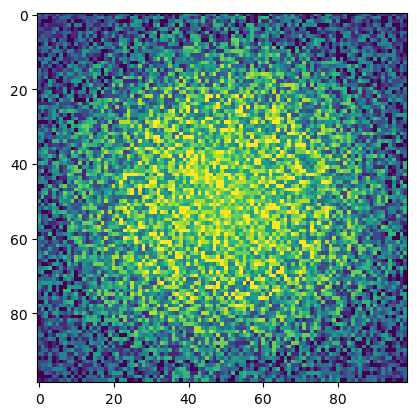

In [156]:
plt.imshow(grid)

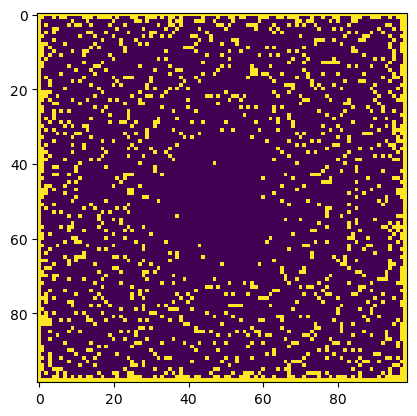

In [157]:
plt.imshow(visible)

In [158]:
visible.sum()

1715

# Part 2

In [191]:
def compare(line, el):
    cmp = line >= el
    if ~cmp.any():
        return line.shape[0]
    return cmp.argmax() + 1

def score_pos(grid, i, j):
    score_down = compare(grid[i+1:, j], grid[i, j])
    score_up = compare(grid[i-1::-1, j], grid[i, j])
    score_right = compare(grid[i, j+1:], grid[i, j])
    score_left = compare(grid[i, j-1::-1], grid[i, j])
    score = score_down * score_up * score_right * score_left
    return score

def compute_score_grid(grid):
    score_grid = np.zeros_like(grid, dtype=int)
    for i in range(1, grid.shape[0] - 1):
        for j in range(1, grid.shape[1] - 1):
            score_grid[i, j] = score_pos(grid, i, j)
    return score_grid

In [192]:
score_grid = compute_score_grid(grid_test)
score_grid

array([[0, 0, 0, 0, 0],
       [0, 1, 4, 1, 0],
       [0, 6, 1, 2, 0],
       [0, 1, 8, 3, 0],
       [0, 0, 0, 0, 0]])

In [193]:
score_grid.max()

8

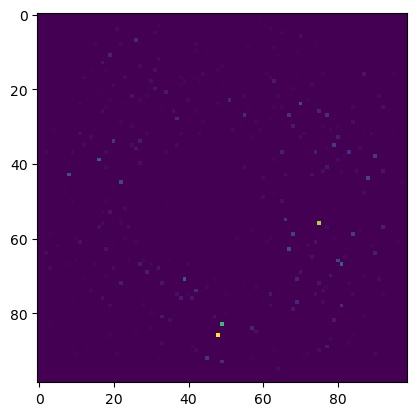

In [195]:
score_grid = compute_score_grid(grid)
plt.imshow(score_grid)

In [196]:
score_grid.max()

374400